<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Task 1: Become familiar with the dataset

In [5]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(boston_df.head())

# Display basic information about the dataset
print("\nBasic information about the dataset:")
print(boston_df.info())

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(boston_df.describe())

# Check for missing values
print("\nNumber of missing values in each column:")
print(boston_df.isnull().sum())

First few rows of the dataset:
   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    flo

#### Task 2: Generate Descriptive Statistics and Visualizations

In [6]:
# Task 2
# For the "Median value of owner-occupied homes" provide a boxplot
# Provide a  bar plot for the Charles river variable
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
# Create a histogram for the pupil to teacher ratio variable

#### Question 2.1: For the "Median value of owner-occupied homes" provide a boxplot

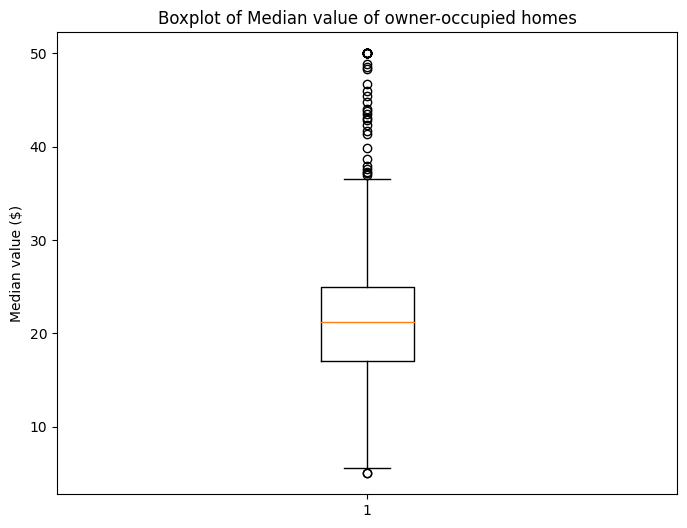

In [7]:
import matplotlib.pyplot as plt

# Create a boxplot for the "Median value of owner-occupied homes" column
plt.figure(figsize=(8, 6))
plt.boxplot(boston_df['MEDV'])
plt.title('Boxplot of Median value of owner-occupied homes')
plt.ylabel('Median value ($)')
plt.show()

In [8]:
boston_df['MEDV'].median()

21.2

##### Explanation: This boxplot displays the distribution of median values of owner-occupied homes. The median is at around 21.

#### Question 2.2: Provide a  bar plot for the Charles river variable

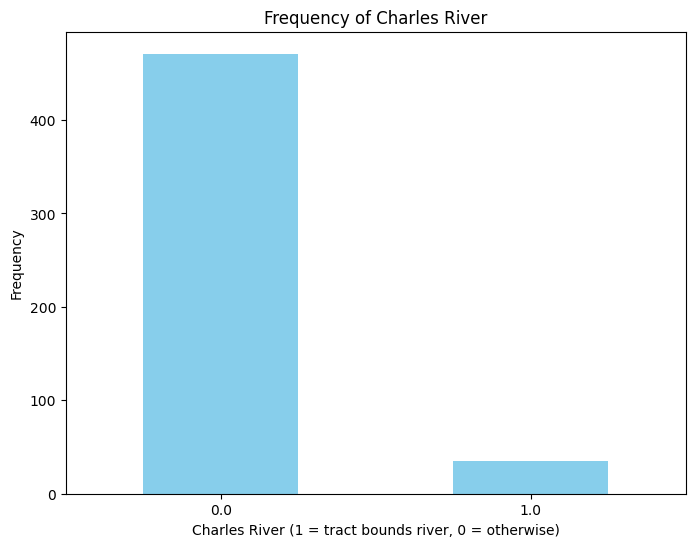

In [9]:
# Count the frequency of each unique value in the "Charles river" column
charles_river_counts = boston_df['CHAS'].value_counts()
# Create a bar plot
plt.figure(figsize=(8, 6))
charles_river_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Charles River')
plt.xlabel('Charles River (1 = tract bounds river, 0 = otherwise)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

##### Explanation: This bar plot shows the frequency of houses bounded and not bounded by the Charles river.

#### Question 2.3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

<Figure size 1000x600 with 0 Axes>

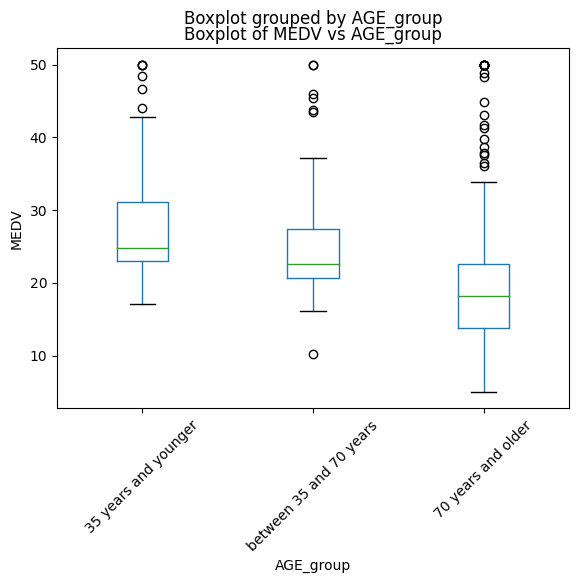

In [10]:
# Discretize the "AGE" variable into three groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

# Create a boxplot for "MEDV" vs "AGE_group"
plt.figure(figsize=(10, 6))
boston_df.boxplot(column='MEDV', by='AGE_group', grid=False)
plt.title('Boxplot of MEDV vs AGE_group')
plt.xlabel('AGE_group')
plt.ylabel('MEDV')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

##### Explanation: This boxplot displays the distribution of median values of owner-occupied homes (MEDV) across three age groups.

#### Question 2.4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

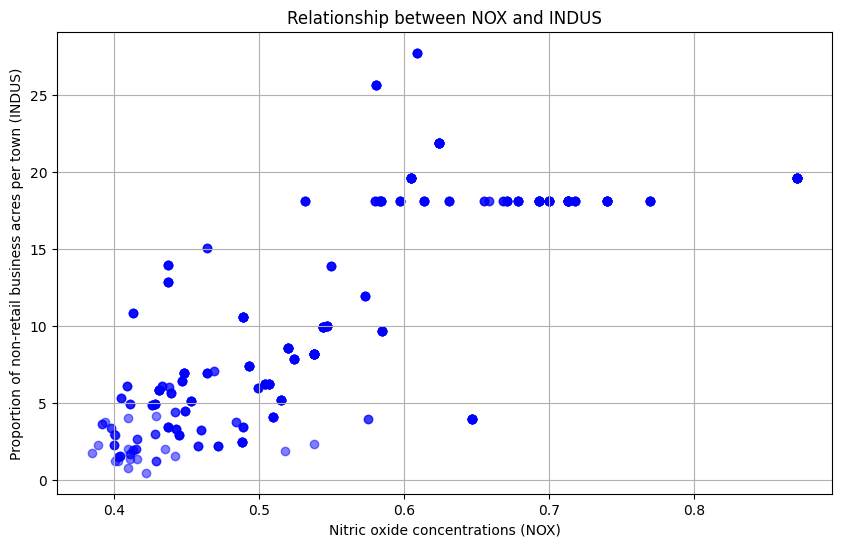

In [11]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(boston_df['NOX'], boston_df['INDUS'], color='blue', alpha=0.5)
plt.title('Relationship between NOX and INDUS')
plt.xlabel('Nitric oxide concentrations (NOX)')
plt.ylabel('Proportion of non-retail business acres per town (INDUS)')
plt.grid(True)
plt.show()

##### Explanation: This scatter plot shows the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. It shows a positive correlation when the value is less than 0.6. Then, the INDUS remains at around 18 although the NOX is increasing.

#### Question 2.5: Create a histogram for the pupil to teacher ratio variable

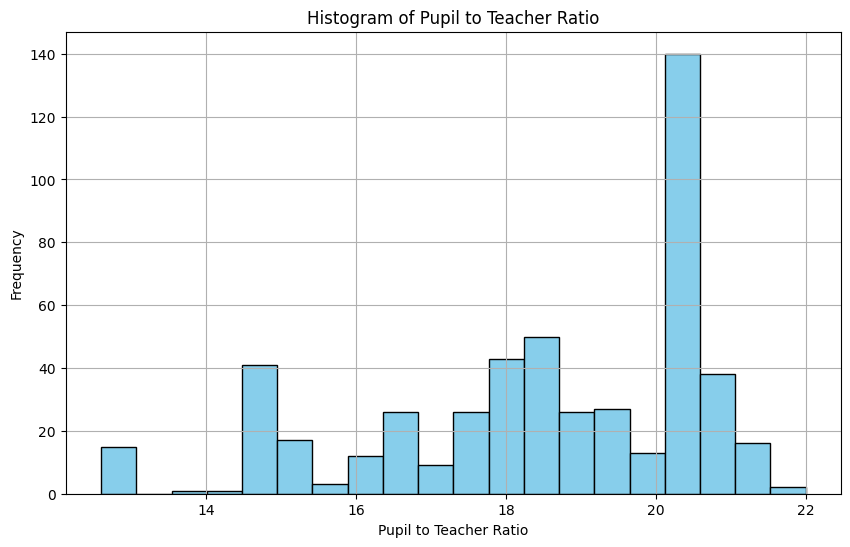

In [12]:
# Create a histogram for the "pupil to teacher ratio" variable
plt.figure(figsize=(10, 6))
plt.hist(boston_df['PTRATIO'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### Explanation: This histogram displays the distribution of pupil to teacher ratio. It shows the frequency of different pupil to teacher ratio values. The maximum frequency seem to occur for the pupil to teacher ratio in the bin of 20.

#### Task 3

In [13]:
# Task 3
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#### Question 3.1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [14]:
from scipy.stats import ttest_ind

print("Hypothesis:")
print("Null Hypothesis (H0): There is no significant difference in median values of houses bounded by the Charles river and those not bounded by the Charles river.")
print("Alternative Hypothesis (Ha): There is a significant difference in median values of houses bounded by the Charles river and those not bounded by the Charles river.")
print("")

# Perform t-test
t_statistic, p_value = ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'])
print("Test Statistics:")
print("t_statistic: {0}, P-Value: {1}".format(t_statistic, p_value))
print(f"{p_value=}")
print("")

# Conclusion:
print("Conclusion:")
if p_value < 0.05:
    print("p_value < 0.05")
    print("Reject the null hypothesis. There is a significant difference in median values of houses bounded by the Charles river and those not bounded by the Charles river.")
else:
    print("p_value >= 0.05")
    print("Fail to reject the null hypothesis. There is no significant difference in median values of houses bounded by the Charles river and those not bounded by the Charles river.")


Hypothesis:
Null Hypothesis (H0): There is no significant difference in median values of houses bounded by the Charles river and those not bounded by the Charles river.
Alternative Hypothesis (Ha): There is a significant difference in median values of houses bounded by the Charles river and those not bounded by the Charles river.

Test Statistics:
t_statistic: 3.996437466090509, P-Value: 7.390623170519905e-05
p_value=7.390623170519905e-05

Conclusion:
p_value < 0.05
Reject the null hypothesis. There is a significant difference in median values of houses bounded by the Charles river and those not bounded by the Charles river.


#### Question 3.2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [15]:
from scipy.stats import f_oneway

print("Hypothesis:")
print("Null Hypothesis (H0): There is no significant difference in median values of houses for each proportion of owner occupied units built prior to 1940 (AGE).")
print("Alternative Hypothesis (Ha): There is a significant difference in median values of houses for each proportion of owner occupied units built prior to 1940 (AGE).")
print("")

# Perform ANOVA
f_statistic, p_value = f_oneway(boston_df[boston_df['AGE'] <= 35]['MEDV'],
                                 boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70)]['MEDV'],
                                 boston_df[boston_df['AGE'] > 70]['MEDV'])
print("Test Statistics:")
print("f_statistic: {0}, P-Value: {1}".format(f_statistic, p_value))
print(f"{p_value=}")
print("")

# Conclusion:
print("Conclusion:")
if p_value < 0.05:
    print("p_value < 0.05")
    print("Reject the null hypothesis. There is a significant difference in median values of houses for each proportion of owner occupied units built prior to 1940 (AGE).")
else:
    print("p_value >= 0.05")
    print("Fail to reject the null hypothesis. There is no significant difference in median values of houses for each proportion of owner occupied units built prior to 1940 (AGE).")


Hypothesis:
Null Hypothesis (H0): There is no significant difference in median values of houses for each proportion of owner occupied units built prior to 1940 (AGE).
Alternative Hypothesis (Ha): There is a significant difference in median values of houses for each proportion of owner occupied units built prior to 1940 (AGE).

Test Statistics:
f_statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15
p_value=1.7105011022702984e-15

Conclusion:
p_value < 0.05
Reject the null hypothesis. There is a significant difference in median values of houses for each proportion of owner occupied units built prior to 1940 (AGE).


#### Question 3.3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [16]:
from scipy.stats import pearsonr

print("Hypothesis:")
print("Null Hypothesis (H0): There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
print("Alternative Hypothesis (Ha): There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
print("")

# Perform Pearson correlation
corr_coef, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Test Statistics:")
print("corr_coef: {0}, P-Value: {1}".format(corr_coef, p_value))
print(f"{p_value=}")
print("")

# Conclusion:
print("Conclusion:")
if p_value < 0.05:
    print("p_value < 0.05")
    print("Reject the null hypothesis. There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    rint("p_value >= 0.05")
    print("Fail to reject the null hypothesis. There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")


Hypothesis:
Null Hypothesis (H0): There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
Alternative Hypothesis (Ha): There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

Test Statistics:
corr_coef: 0.7636514469209192, P-Value: 7.913361061210442e-98
p_value=7.913361061210442e-98

Conclusion:
p_value < 0.05
Reject the null hypothesis. There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


#### Question 3.4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [17]:
import statsmodels.api as sm

print("Hypothesis:")
print("Null Hypothesis (H0): There is no significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.")
print("Alternative Hypothesis (Ha): There is a significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.")
print("")

# Fit the regression model
X = boston_df['DIS']
X = sm.add_constant(X)
y = boston_df['MEDV']
model = sm.OLS(y, X).fit()

# Print out the statistics
print("Test Statistics:")
print(model.summary())
print("")

# Conclusion:
print("Conclusion:")
if model.pvalues['DIS'] < 0.05:
    print("p_value < 0.05")
    print("Reject the null hypothesis. There is a significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.")
else:
    print("p_value >= 0.05")
    print("Fail to reject the null hypothesis. There is no significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.")


Hypothesis:
Null Hypothesis (H0): There is no significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
Alternative Hypothesis (Ha): There is a significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

Test Statistics:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        11:21:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                         

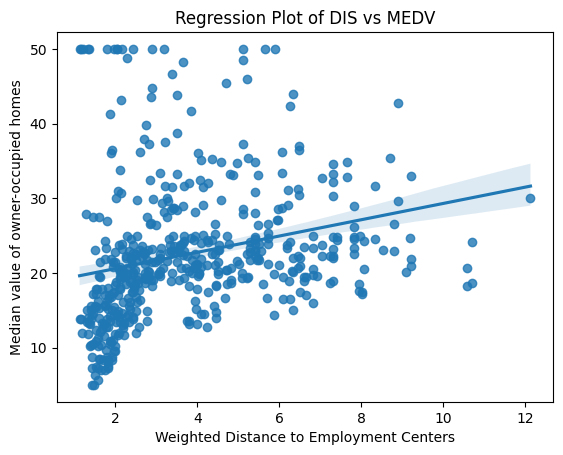

In [19]:
# Create the regression plot
sns.regplot(x=boston_df['DIS'], y=boston_df['MEDV'])
plt.xlabel('Weighted Distance to Employment Centers')
plt.ylabel('Median value of owner-occupied homes')
plt.title('Regression Plot of DIS vs MEDV')
plt.show()